📊 Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.40      0.44      1484
           1       0.50      0.58      0.53      1516

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000

✅ High-risk product list saved as 'high_risk_products.csv'.


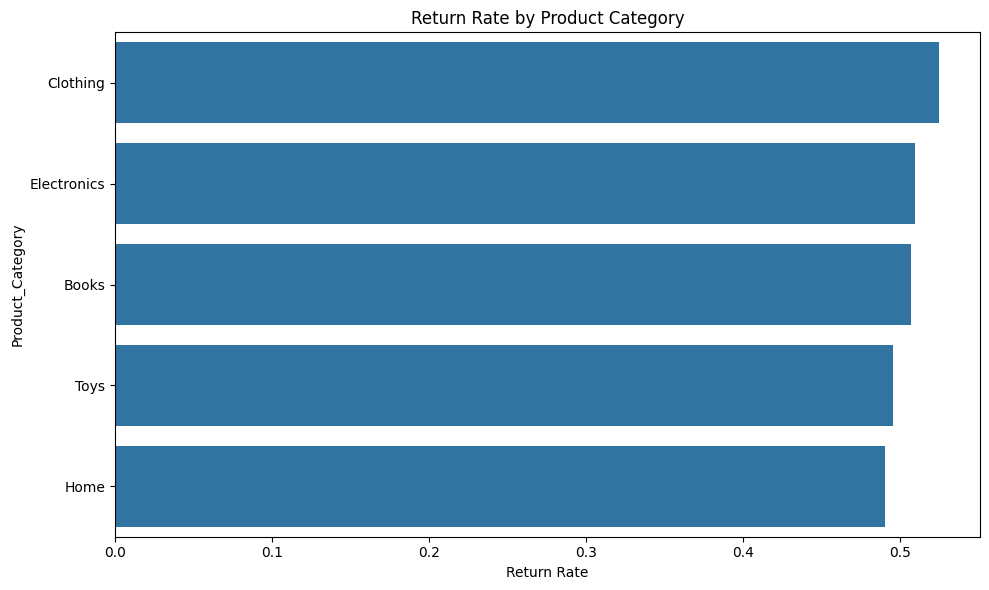

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ecommerce_returns_synthetic_data.csv')  # Replace with your path if needed

# Step 1: Add a binary return flag
df['is_returned'] = (df['Return_Status'] == 'Returned').astype(int)

# Step 2: Select relevant features
features = ['Product_Category', 'Product_Price', 'Order_Quantity', 'Discount_Applied',
            'User_Age', 'User_Gender', 'User_Location', 'Payment_Method', 'Shipping_Method']

# Step 3: Encode categorical features
encoded_df = df[features + ['is_returned']].copy()
for col in ['Product_Category', 'User_Gender', 'User_Location', 'Payment_Method', 'Shipping_Method']:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

# Step 4: Prepare input (X) and target (y)
X = encoded_df.drop(columns='is_returned')
y = encoded_df['is_returned']

# Step 5: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predict return probabilities and labels
df['return_probability'] = model.predict_proba(X)[:, 1]
df['predicted_return'] = model.predict(X)

# Step 8: Evaluate model performance
y_pred_test = model.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred_test))

# Step 9: Filter high-risk products (e.g., probability > 0.5)
high_risk = df[df['return_probability'] > 0.5]

# Step 10: Export high-risk products to CSV
high_risk.to_csv('high_risk_products.csv', index=False)
print("✅ High-risk product list saved as 'high_risk_products.csv'.")

# Optional: Plot Return Rates by Category
return_rate_by_category = df.groupby('Product_Category')['is_returned'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=return_rate_by_category.values, y=return_rate_by_category.index)
plt.xlabel("Return Rate")
plt.title("Return Rate by Product Category")
plt.tight_layout()
plt.show()
